# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Sample-1" data-toc-modified-id="Sample-1-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Sample 1</a></div><div class="lev1 toc-item"><a href="#Sample-2" data-toc-modified-id="Sample-2-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Sample 2</a></div><div class="lev1 toc-item"><a href="#Sample-3" data-toc-modified-id="Sample-3-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Sample 3</a></div>

** Running ready-made code **

# Sample 1

Reference: http://www.fisproject.jp/2015/12/mcmc-in-python/

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D

In [3]:
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['axes.labelsize'] = 18

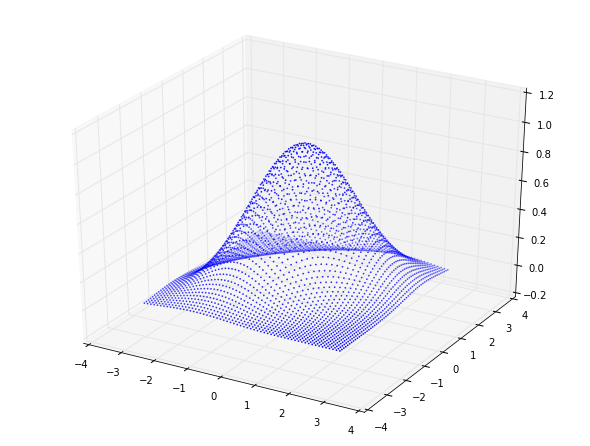

In [4]:
def range_ex(start, end, step):
    while start + step < end:
        yield start
        start += step

# P(x) : Target distribution
def P(x1, x2, b):
    return np.exp(-1/2 * (x1**2 - 2*b*x1*x2 + x2**2))

xs = []
ys = []
zs = []
b = 0.5

for i in range_ex(-3, 3, 0.1):
    for j in range_ex(-3, 3, 0.1):
        xs.append(i)
        ys.append(j)
        zs.append(P(i, j, b))

ax = Axes3D(plt.figure())
ax.scatter3D(xs, ys, zs, s=3, edgecolor='None')
plt.show()

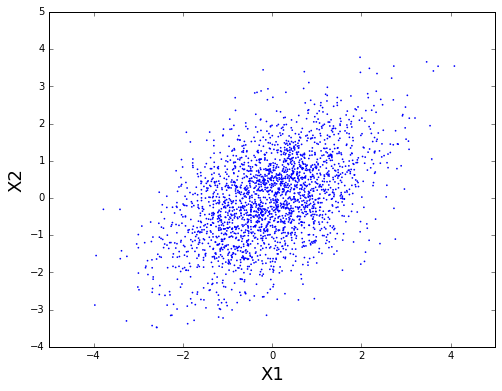

In [5]:
def gibbs(N, thin):
    s = []
    x1 = 0.0
    x2 = 0.0
    for i in range(N):
        for j in range(thin):
            x1 = np.random.normal(b * x2, 1) # P(x1|x2)
            x2 = np.random.normal(b * x1, 1) # P(x2|x1)
        s.append((x1,x2))
    return np.array(s)

N = 3000
thin = 500
burn_in = 0.2

sample = gibbs(N, thin)

plt.scatter(
    sample[int(N * burn_in):,0],
    sample[int(N * burn_in):,1],
    s=3,
    edgecolor='None'
)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [6]:
print ('x1 :', np.mean(sample[:,0]), np.var(sample[:,0])) 
print ('x2 :', np.mean(sample[:,1]), np.var(sample[:,1]))

x1 : -0.0378076051089 1.29249754797
x2 : -0.00862034805286 1.36792064319


# Sample 2

Reference: https://ga7g08.github.io/2015/02/09/Gibbs-sampler-with-a-bivariate-normal-distribution/

In [7]:
################################################
#  Check p.277 of Gelman's Bayesian Data Analysis for equations #
################################################

# We consider the example of the bivariate normal distribution with unknown mean \theta , but known covariance matrix

from numpy.random import normal 
def GibbsSampler(theta0, y, k, rho):
    """ Simple implementation of the Gibbs sampler for a bivariate normal
        distribution. """
    
    theta = [theta0]
    for i in range(k):
        theta2 = theta[-1][1] # theta2 from previous iteration
        theta1 = normal(y[0] + rho*(theta2 - y[1]), 1-rho**2)
        theta.append([theta1, theta2])
        theta2 = normal(y[1] + rho*(theta1 - y[0]), 1-rho**2)
        theta.append([theta1, theta2])
        
    return np.array(theta)
        
# Data as given by Gelman et al. 
y = [0, 0]
rho = 0.8
k = 500

# Four chains starting from four points of a square
theta0_list = [[-2.5, -2.5], [2.5, -2.5], [-2.5, 2.5], [2.5, 2.5]]
data = []
for theta0 in theta0_list:
    data.append(GibbsSampler(theta0, y, k, rho))

data = np.array(data)

In [8]:
data.shape
    # The first axis gives the four chains (started from four different initial conditions, 
    # the second gives the iteration number (of length  2k+1)  for each chain 
    # because we are saving the data after each update and we added the initial data, 
    # the final axis is the number of dimensions (in this case 2).

(4, 1001, 2)

In [9]:
plt.rcParams['figure.figsize'] = (5, 4)
plt.rcParams['axes.labelsize'] = 15

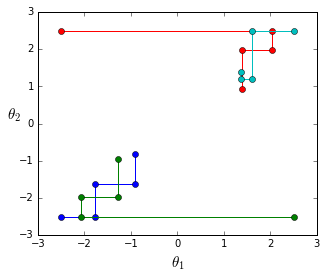

In [10]:
nsteps = 5
for i in range(4):
    plt.plot(data[i, 0:nsteps, 0], data[i, 0:nsteps, 1], "o-")
    
plt.xlabel(r"$\theta_1$")
plt.ylabel(r"$\theta_2$", rotation="horizontal")

plt.show()

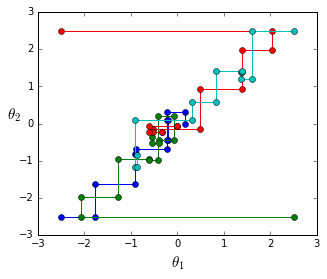

In [11]:
nsteps = 15
for i in range(4):
    plt.plot(data[i, 0:nsteps, 0], data[i, 0:nsteps, 1], "o-")
    
plt.xlabel(r"$\theta_1$")
plt.ylabel(r"$\theta_2$", rotation="horizontal")

plt.show()

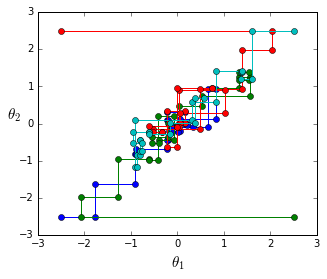

In [12]:
nsteps = 30
for i in range(4):
    plt.plot(data[i, 0:nsteps, 0], data[i, 0:nsteps, 1], "o-")
    
plt.xlabel(r"$\theta_1$")
plt.ylabel(r"$\theta_2$", rotation="horizontal")

plt.show()

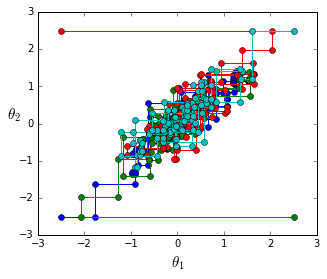

In [13]:
nsteps = 100
for i in range(4):
    plt.plot(data[i, 0:nsteps, 0], data[i, 0:nsteps, 1], "o-")
    
plt.xlabel(r"$\theta_1$")
plt.ylabel(r"$\theta_2$", rotation="horizontal")

plt.show()

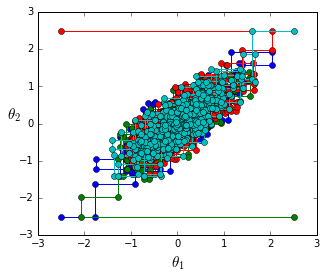

In [14]:
nsteps = k
for i in range(4):
    plt.plot(data[i, 0:nsteps, 0], data[i, 0:nsteps, 1], "o-")
    
plt.xlabel(r"$\theta_1$")
plt.ylabel(r"$\theta_2$", rotation="horizontal")

plt.show()

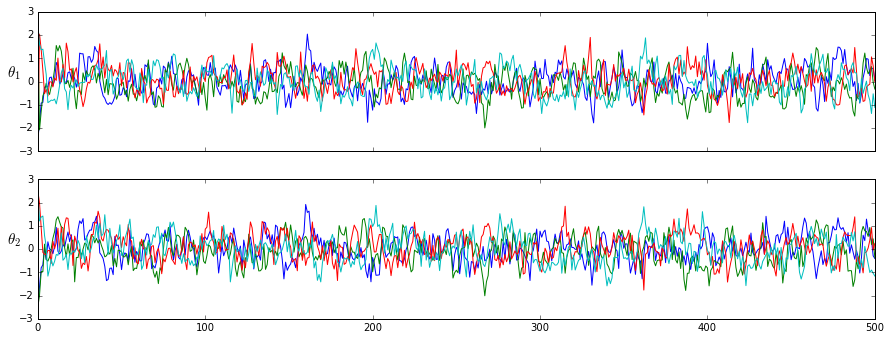

In [15]:
plt.rcParams['figure.figsize'] = (15, 5.5)
data_reduced = data[:, ::2, :]
    # In the example so far we purposefully left in data from the updates during each iteration. 
    # Before trying to do any analysis this should be removed.
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True)

for j in range(4):
    ax1.plot(range(k+1), data_reduced[j, :, 0])
    ax2.plot(range(k+1), data_reduced[j, :, 1])

ax1.set_ylabel(r"$\theta_1$", rotation="horizontal")
ax2.set_ylabel(r"$\theta_2$", rotation="horizontal")
plt.show()

# Sample 3

Reference: http://nykergoto.hatenablog.jp/entry/2015/08/06/033534

In [16]:
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['axes.labelsize'] = 18

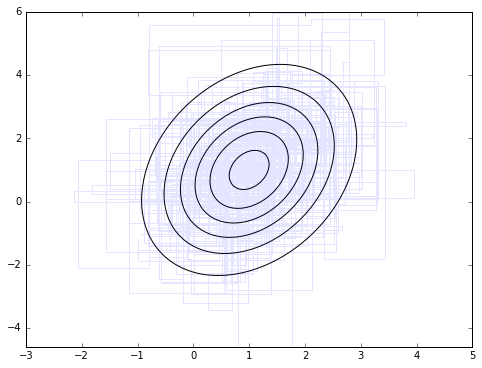

In [17]:
import scipy.stats as stats

## 2dimention normal distribution
nu = np.ones((2))
covariance = np.array([[1,0.5],[0.5,3]])
# la:   固有値array
# v:    固有ベクトル array
la,v = np.linalg.eig(covariance)
avr_sigma = np.average(la) #あとでプロット範囲を決めるときの指標に

def gibssampling(nu,cov,sample_size):
    """
    Gibbs sampling !
    @nu     :average vector
    @cov    :covariance matrix
    @sample_size    :size of sample
    return type     :numpy.array
    length          :sample_size
    """
    samples = []
    dim = len(nu)
    # start point of sampling
    start = [0,0]
    samples.append(start)
    search_dim = 0
    for i in range(sample_size):
        if search_dim == dim-1:
            """
            search dimension select is cyclic
            it can replace randomly
            """
            search_dim = 0
        else:
            search_dim = search_dim +1
        #new-sampling

        prev_sample = samples[-1][:] # previous sample
        A = cov[search_dim][search_dim-1] / float(cov[search_dim-1][search_dim-1]) # A*Σ_yy = Σ_xy
        _y = prev_sample[search_dim-1] # other dimention's previous values

        # p(x|y) ~ N(x|nu[x]+A(_y-nu[y]),Σ_zz)
        # Σ_zz = Σ_xx - A0*Σ_yx

        mean = nu[search_dim] + A*(_y-nu[search_dim-1]) 
        sigma_zz = cov[search_dim][search_dim] -A*cov[search_dim-1][search_dim]

        sample_x = np.random.normal(loc=mean,scale=np.power(sigma_zz,.5),size=1)
        prev_sample[search_dim] = sample_x[0]

        samples.append(prev_sample)
    return np.array(samples)

sample = gibssampling(nu,covariance,1000)
plt.plot(sample[:,0],sample[:,1],alpha=.1)

#答え合わせ
malti_normal = stats.multivariate_normal(mean=nu,cov=covariance)
X,Y = np.meshgrid(np.linspace(nu[0]-avr_sigma*2,nu[0]+avr_sigma*2,100),
                  np.linspace(nu[1]-avr_sigma*2,nu[1]+avr_sigma*2,100))
Pos = np.empty(X.shape + (2,))
Pos[:,:,0]=X
Pos[:,:,1]=Y
Z=malti_normal.pdf(Pos)
plt.contour(X,Y,Z,colors="k")
plt.show()